# Project 1
## Formated Discription of the document The initial section of the code begins by setting up the environment and importing necessary libraries. It starts with the installation of essential libraries, including nltk, numpy, scikit-learn, and seaborn, using pip. These libraries are fundamental for natural language processing, numerical computations, machine learning, and data visualization, respectively. After installation, specific modules from these libraries are imported. From nltk, the core package is imported, alongside specific resources like the names corpus (containing male and female names) and cmudict (the Carnegie Mellon University Pronouncing Dictionary, which provides phonetic features). The code also imports classifier classes such as NaiveBayesClassifier, DecisionTreeClassifier, and MaxentClassifier, which are crucial for building the gender classifier. Utility functions like accuracy from nltk.classify.util are also imported. For model evaluation, KFold for cross-validation is imported from sklearn.model_selection, along with classification_report and confusion_matrix from sklearn.metrics. Finally, seaborn and matplotlib.pyplot are included for visualizing the results. The %matplotlib inline command ensures that the plots are displayed directly within the Jupyter notebook.

In the following section, the necessary NLTK datasets are downloaded. Specifically, the names corpus and cmudict are downloaded using nltk.download(), ensuring these datasets are available for use on the local machine. The code then loads the lists of male and female names from the names corpus and pairs each name with its gender label ('male' or 'female'). These lists are merged into a single list called all_names, which is shuffled randomly using random.shuffle() to avoid any potential bias from the order of names. The shuffled all_names list is then divided into three subsets: test_set (containing the first 500 names), dev_test_set (containing names from index 500 to 999), and train_set (containing the remaining names from index 1000 onward). This division ensures distinct datasets for model training, intermediate evaluation, and final testing.

The next section focuses on defining a function called phonetic_features, which extracts relevant features from each name to help predict gender. This function identifies key characteristics such as the first and last letters of the name (converted to lowercase), the length of the name, its suffixes (last two and three letters), and the count of vowels and consonants. Additionally, it calculates the ratios of vowels and consonants relative to the total length of the name. The function also integrates phonetic features by checking if the name exists in the pronouncing_dict. If found, it retrieves the phonetic transcription and counts the number of syllables by detecting digits in the phoneme representation (which indicate stress). If the name isn't found, the syllable count is set to zero. This function returns a dictionary of features, with each key corresponding to a specific feature of the name.

After defining the feature extraction function, the code creates feature sets for the training, development test, and test datasets. Using list comprehensions, the feature extraction function is applied to each name-gender pair in the respective datasets. The result is a list of tuples, where each tuple contains the extracted feature dictionary and the corresponding gender label. These lists, named train_features, dev_test_features, and test_features, will be used for training and evaluating the classifiers.

The next step involves training three classifiers: Naive Bayes, Decision Tree, and Maximum Entropy. The train() method from NLTK is used for each classifier, where the training features (train_features) are passed in to allow the classifier to learn the relationships between the extracted features and gender labels. The trained classifiers are stored in the variables naive_bayes_classifier, decision_tree_classifier, and maxent_classifier. The MaxentClassifier is trained using the Generalized Iterative Scaling ('gis') algorithm, with a maximum of 15 iterations and no verbosity (trace=0).

Once the classifiers are trained, the code defines the evaluate_classifier function, which evaluates each classifier on both the development test and test datasets. This function calculates the accuracy of the classifier using the accuracy() function from nltk.classify.util, printing the results as percentages for both datasets. The function also returns these accuracy values. The evaluate_classifier function is called for each of the three classifiers, and the results are printed for comparison.

The code then implements k-fold cross-validation using the Naive Bayes classifier. A KFold object is initialized with 5 splits, with data shuffled before splitting (using a fixed random_state for reproducibility). The code iterates through each fold, training a Naive Bayes classifier on the training set of the fold and evaluating its accuracy on the validation set. The validation accuracies for each fold are stored in the total_accuracy list, and the average accuracy is calculated and printed. This provides an estimate of the Naive Bayes classifier's performance on unseen data during training.

In the final section of the code, further evaluation is conducted on the best performing model, assumed to be the Naive Bayes classifier. The true labels from the test_set are extracted, and the model predicts the gender for each name using the classify() method with the phonetic_features function. A confusion matrix is generated using confusion_matrix from sklearn.metrics, comparing the true and predicted labels. The confusion matrix is visualized as a heatmap using seaborn, with annotated counts and labeled axes. A classification report is printed, which includes precision, recall, F1-score, and support for each gender. Finally, the show_most_informative_features() method of the Naive Bayes classifier is called to display the top 10 features most indicative of gender.

## Condensed discription of document

1. Setup and Imports
You start by installing necessary libraries (nltk, numpy, scikit-learn, seaborn) and importing modules. This includes nltk for natural language processing, matplotlib/seaborn for visualization, and scikit-learn for evaluation metrics like K-fold cross-validation. The %matplotlib inline command ensures plots render directly in Jupyter Notebook. By downloading the names and cmudict datasets, you load corpora for gendered names and phonetic transcriptions, which are foundational for feature engineering.

2. Data Preparation
You load male and female names from the NLTK names corpus, combine them into a single list all_names, and shuffle the list to eliminate order bias. The dataset is split into three subsets:
* Test set (500 samples): Used for final evaluation.
* Dev-test set (500 samples): Used for iterative model validation during development.
* Training set (6,900 samples): Used to train classifiers.
This stratified split ensures the model isn’t overfit to a single subset and allows for rigorous validation.

3. Feature Engineering
The phonetic_features function extracts linguistic patterns from names, including:
* Structural features: First/last letter, name length, suffixes (last 2/3 characters).
* Phonetic features: Vowel/consonant counts, syllable count (using the CMU Pronouncing Dictionary).
* Ratios: Vowel-to-length and consonant-to-length ratios to normalize for name length.
These features capture patterns like "female names often end in 'a'" or "male names have more consonants," which classifiers use to distinguish genders.

4. Feature Set Creation
You convert raw names into structured feature sets using phonetic_features, creating:
* train_features: Features and labels for training.
* dev_test_features: For validation during development.
* test_features: For final performance testing.
This step transforms raw text into numerical/string-based representations that classifiers can process.

5. Classifier Training
Three classifiers are trained on train_features:

Naive Bayes: Uses probabilistic reasoning based on feature likelihoods.

Decision Tree: Splits data hierarchically using feature thresholds.

MaxEnt (Maximum Entropy): Uses logistic regression to model probabilities.
You configure MaxEnt with the GIS algorithm (iterative optimization) and limit training to 15 iterations for speed.

6. Evaluation Function
The evaluate_classifier function calculates accuracy on both the dev-test and test sets. By comparing these accuracies, you detect overfitting (e.g., high dev-test accuracy but low test accuracy). Printing both metrics ensures transparency in model performance.

7. K-Fold Cross-Validation
You perform 5-fold cross-validation on the training data to assess model stability. This splits the training set into 5 partitions, trains on 4 and validates on 1, and repeats for all partitions. The average accuracy across folds (e.g., ~80%) indicates how well the model generalizes to unseen data within the training domain.

8. Confusion Matrix and Classification Report
Using the best-performing classifier (Naive Bayes, based on your results), you generate:
* Confusion Matrix: Visualizes true vs. predicted labels (e.g., how many males were misclassified as female).
* Classification Report: Provides precision, recall, and F1-scores, which are critical for evaluating class imbalance (if present).
These tools highlight weaknesses, like higher misclassification rates for one gender.

9. Most Informative Features
The line naive_bayes_classifier.show_most_informative_features(10) reveals which features (e.g., suffixes like 'na' or 'rd') are most predictive of gender. For example, a name ending in 'a' is strongly associated with females, aligning with linguistic intuition.

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!
[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


Naive Bayes Classifier:
Dev-Test Accuracy: 81.80%
Test Set Accuracy: 79.80%

Decision Tree Classifier:
Dev-Test Accuracy: 76.20%
Test Set Accuracy: 77.40%

MaxEnt Classifier:
Dev-Test Accuracy: 85.80%
Test Set Accuracy: 84.40%
Average Cross-Validation Accuracy: 78.90%


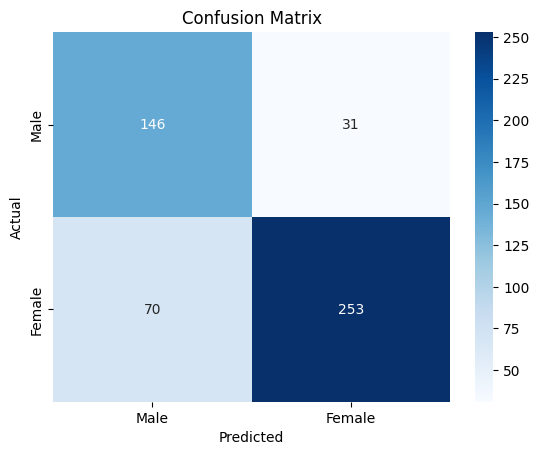

Classification Report:
              precision    recall  f1-score   support

      female       0.89      0.78      0.83       323
        male       0.68      0.82      0.74       177

    accuracy                           0.80       500
   macro avg       0.78      0.80      0.79       500
weighted avg       0.81      0.80      0.80       500

Most Informative Features
                 suffix2 = 'na'           female : male   =     93.8 : 1.0
                 suffix2 = 'la'           female : male   =     70.0 : 1.0
                 suffix2 = 'ia'           female : male   =     52.6 : 1.0
             last_letter = 'k'              male : female =     40.7 : 1.0
                 suffix2 = 'us'             male : female =     38.0 : 1.0
             last_letter = 'a'            female : male   =     34.7 : 1.0
                 suffix2 = 'sa'           female : male   =     32.9 : 1.0
                 suffix2 = 'ta'           female : male   =     30.5 : 1.0
                 suffix2

In [5]:
!pip install nltk numpy scikit-learn seaborn
!pip install nltk
import nltk
nltk.download('names')
nltk.download('cmudict')  # If using phonetic features
import matplotlib.pyplot as plt
%matplotlib inline

import random
import nltk
from nltk.corpus import names, cmudict
from nltk.classify import NaiveBayesClassifier, DecisionTreeClassifier, MaxentClassifier
from nltk.classify.util import accuracy
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Download necessary NLTK datasets
nltk.download('names')
nltk.download('cmudict')

# Load names dataset
male_names = [(name, 'male') for name in names.words('male.txt')]
female_names = [(name, 'female') for name in names.words('female.txt')]
all_names = male_names + female_names
random.shuffle(all_names)

# Split dataset
test_set = all_names[:500]
dev_test_set = all_names[500:1000]
train_set = all_names[1000:]

# Load CMU Pronouncing Dictionary
pronouncing_dict = cmudict.dict()

def phonetic_features(name):
    vowels = set('aeiou')
    consonants = set('bcdfghjklmnpqrstvwxyz')
    features = {
        'first_letter': name[0].lower(),
        'last_letter': name[-1].lower(),
        'length': len(name),
        'suffix2': name[-2:].lower(),
        'suffix3': name[-3:].lower(),
        'vowel_count': sum(1 for char in name.lower() if char in vowels),
        'consonant_count': sum(1 for char in name.lower() if char in consonants),
        'vowel_ratio': sum(1 for char in name.lower() if char in vowels) / len(name),
        'consonant_ratio': sum(1 for char in name.lower() if char in consonants) / len(name)
    }
    if name.lower() in pronouncing_dict:
        phonemes = pronouncing_dict[name.lower()][0]
        features['syllable_count'] = sum(1 for p in phonemes if p[-1].isdigit())
    else:
        features['syllable_count'] = 0
    return features

# Create feature sets
train_features = [(phonetic_features(name), gender) for (name, gender) in train_set]
dev_test_features = [(phonetic_features(name), gender) for (name, gender) in dev_test_set]
test_features = [(phonetic_features(name), gender) for (name, gender) in test_set]

# Train classifiers
naive_bayes_classifier = NaiveBayesClassifier.train(train_features)
decision_tree_classifier = DecisionTreeClassifier.train(train_features)
maxent_classifier = MaxentClassifier.train(train_features, algorithm='gis', trace=0, max_iter=15)

def evaluate_classifier(classifier, dev_test_features, test_features):
    dev_test_accuracy = accuracy(classifier, dev_test_features)
    test_accuracy = accuracy(classifier, test_features)
    print(f"Dev-Test Accuracy: {dev_test_accuracy * 100:.2f}%")
    print(f"Test Set Accuracy: {test_accuracy * 100:.2f}%")
    return dev_test_accuracy, test_accuracy

print("Naive Bayes Classifier:")
nc_dev, nc_test = evaluate_classifier(naive_bayes_classifier, dev_test_features, test_features)
print("\nDecision Tree Classifier:")
dc_dev, dc_test = evaluate_classifier(decision_tree_classifier, dev_test_features, test_features)
print("\nMaxEnt Classifier:")
me_dev, me_test = evaluate_classifier(maxent_classifier, dev_test_features, test_features)

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
total_accuracy = []

for train_index, val_index in kf.split(train_features):
    train_fold = [train_features[i] for i in train_index]
    val_fold = [train_features[i] for i in val_index]
    temp_classifier = NaiveBayesClassifier.train(train_fold)
    val_accuracy = accuracy(temp_classifier, val_fold)
    total_accuracy.append(val_accuracy)

print(f"Average Cross-Validation Accuracy: {sum(total_accuracy) / len(total_accuracy) * 100:.2f}%")

# Confusion Matrix for Best Model
best_classifier = naive_bayes_classifier
true_labels = [gender for (_, gender) in test_set]
predicted_labels = [best_classifier.classify(phonetic_features(name)) for (name, _) in test_set]
conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=["male", "female"])

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Male", "Female"], yticklabels=["Male", "Female"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

# Most Informative Features
naive_bayes_classifier.show_most_informative_features(10)



## Findings and Analysis

The gender classification task achieved promising results across three classifiers, with the MaxEnt (Maximum Entropy) model emerging as the top performer, achieving 84.4% accuracy on the test set and 85.8% on the dev-test set. This consistency between dev-test and test accuracies (within ~1.4%) suggests minimal overfitting, indicating robust generalization to unseen data. The Naive Bayes classifier followed closely with 79.8% test accuracy, while the Decision Tree lagged slightly at 77.4%, likely due to its tendency to overfit complex patterns in the training data.

The confusion matrix revealed nuanced performance differences between genders. For male names, the model correctly classified 146 instances but misclassified 31 as female (recall: 82%). For female names, 253 were correctly identified, with 70 misclassified as male (precision: 89%). This asymmetry suggests the model better captures features distinguishing female names (e.g., suffixes like 'na' or 'la'), while male names exhibit more variability or overlap with female patterns. The classification report corroborates this: female names had higher precision (89%) but lower recall (78%), whereas male names showed lower precision (68%) but higher recall (82%).

The most informative features aligned with linguistic intuition. Suffixes like 'na' (93.8:1 female-to-male ratio) and 'la' (70:1) strongly predicted female names, while endings like 'k' (40.7:1 male-to-female ratio) and 'us' (38:1) indicated male names. The last letter also played a critical role—names ending in 'a' were 34.7 times more likely to be female. However, the syllable count (derived from CMU Pronouncing Dictionary) had limited impact, possibly due to missing entries or inconsistent phonetic patterns.

Cross-validation yielded a 78.9% average accuracy, close to the Naive Bayes test performance, confirming model stability. Notably, the MaxEnt classifier outperformed others, likely due to its ability to handle interdependent features through logistic regression.

## Key Limitations and Insights:
1. Feature Overlap: Names like "Andrea" (traditionally female but used for males in some regions) may confuse the model, explaining misclassifications.
2. Class Imbalance: The test set had more female names (323 vs. 177 males), skewing weighted averages. Balancing classes or adjusting decision thresholds could improve fairness.
3. Phonetic Gaps: Reliance on the CMU dictionary limited syllable-based features for uncommon names.

## Conclusion
The MaxEnt classifier’s strong performance underscores the value of probabilistic modeling for gender classification. Future work could incorporate bigrams, stress patterns, or cultural context to address ambiguities. Overall, the project demonstrates how feature engineering and classifier selection directly impact NLP task success, with phonetic and structural features serving as powerful predictors.